In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree, _tree
import numpy as np
import matplotlib.pyplot as plt

In [16]:
wine = datasets.load_wine()

# Feature importance

clf = DecisionTreeClassifier(criterion="gini", splitter='best', random_state=42)
clf = clf.fit(wine.data, wine.target)

for name, val in zip(wine.feature_names, clf.feature_importances_):
    print(f"{name:>40} -> {val}")

print("")

                                 alcohol -> 0.04727507393151268
                              malic_acid -> 0.0
                                     ash -> 0.0
                       alcalinity_of_ash -> 0.0
                               magnesium -> 0.0329784450464887
                           total_phenols -> 0.0
                              flavanoids -> 0.1414466773122087
                    nonflavanoid_phenols -> 0.0
                         proanthocyanins -> 0.0
                         color_intensity -> 0.0
                                     hue -> 0.08378677906228588
            od280/od315_of_diluted_wines -> 0.3120425747831769
                                 proline -> 0.38247044986432716



In [17]:
clf = DecisionTreeClassifier(criterion="entropy", splitter='best', random_state=42)
clf = clf.fit(wine.data, wine.target)

for name, val in zip(wine.feature_names, clf.feature_importances_):
    print(f"{name:>40} -> {val}")

                                 alcohol -> 0.014123729330936566
                              malic_acid -> 0.0
                                     ash -> 0.0
                       alcalinity_of_ash -> 0.02525179137252771
                               magnesium -> 0.0
                           total_phenols -> 0.0
                              flavanoids -> 0.4128453371544815
                    nonflavanoid_phenols -> 0.0
                         proanthocyanins -> 0.0
                         color_intensity -> 0.22278576133186542
                                     hue -> 0.011635633063349873
            od280/od315_of_diluted_wines -> 0.0
                                 proline -> 0.31335774774683883


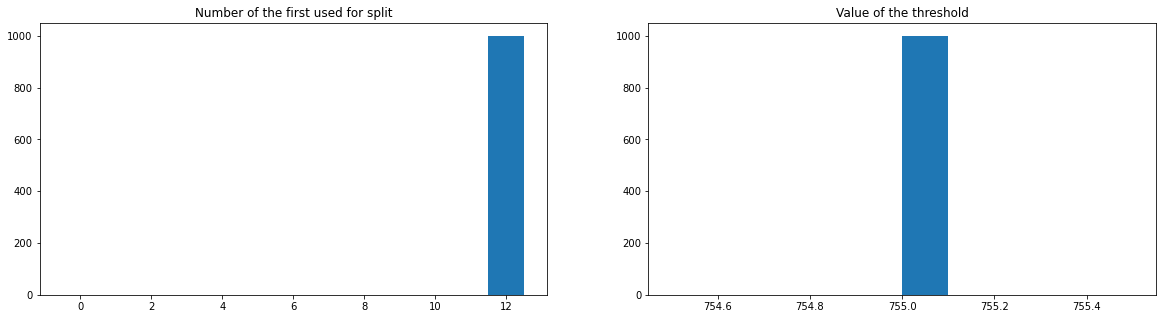

In [18]:
# Feature selected first and threshold

features = []
tresholds = []
for random in range(1000):
    clf = DecisionTreeClassifier(criterion="gini", splitter='best', random_state=random)
    clf = clf.fit(wine.data, wine.target)
    features.append(clf.tree_.feature[0])
    tresholds.append(clf.tree_.threshold[0])

# plot distribution
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax.hist(features, bins=np.arange(14)-0.5)
ax2.hist(tresholds)
ax.set_title("Number of the first used for split")
ax2.set_title("Value of the threshold")
plt.show()

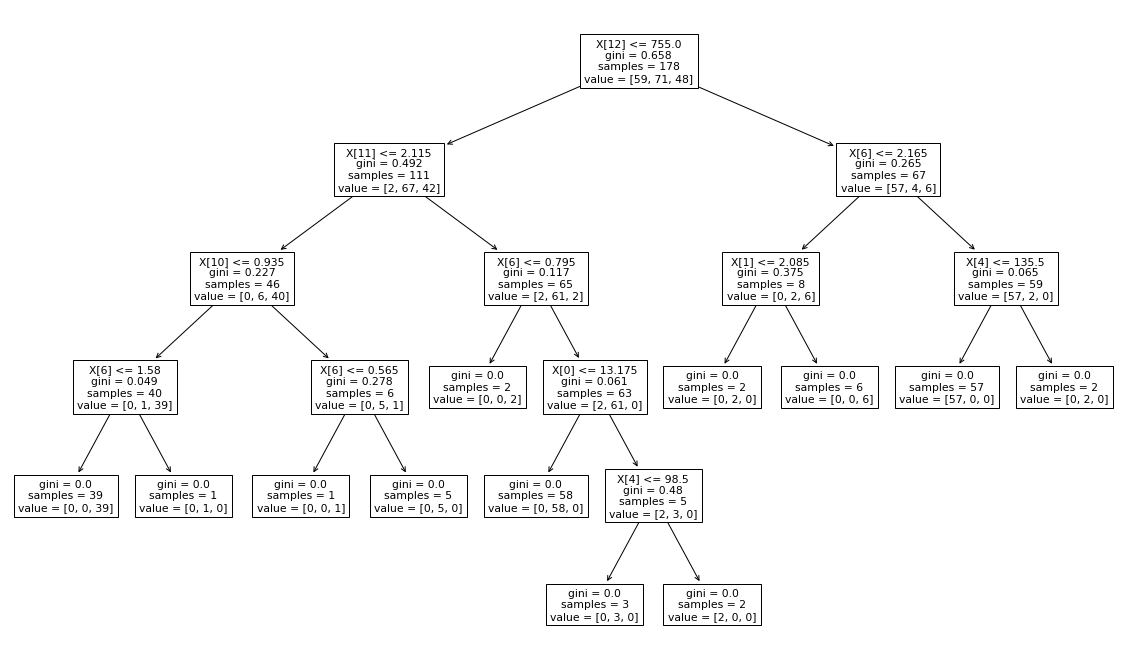

In [19]:
# plot model
plt.figure(figsize=(20, 12))
plot_tree(clf) 
plt.show()

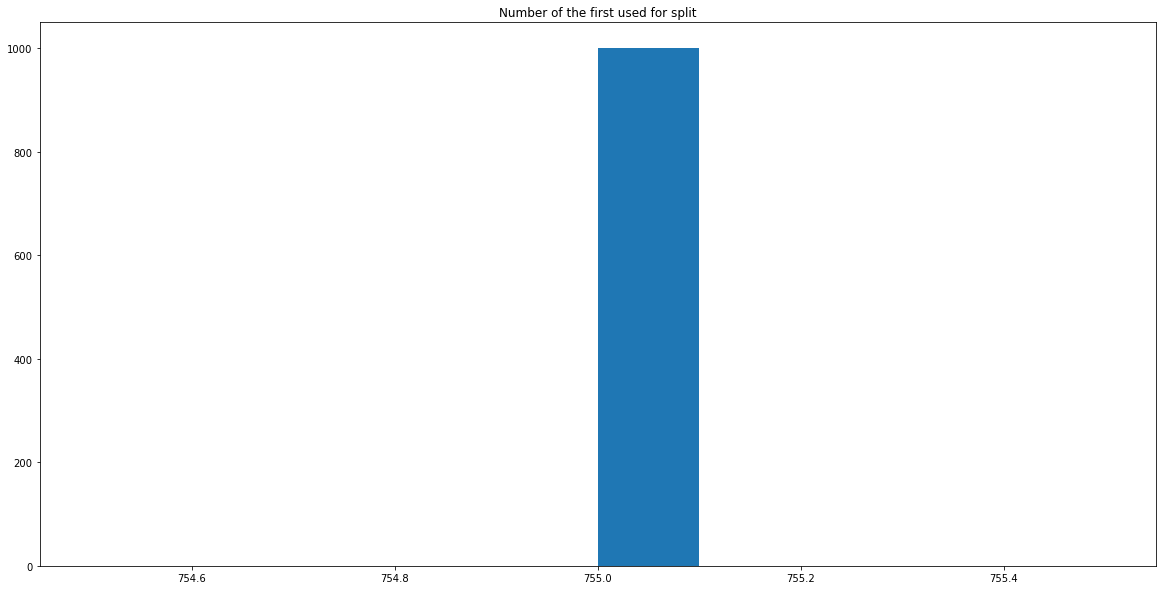

In [21]:
# plot filtered result
threshold_filtered = [val for feat, val in zip(features, tresholds) if feat==12]
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.hist(threshold_filtered)
ax.set_title("Number of the first used for split")
plt.show()

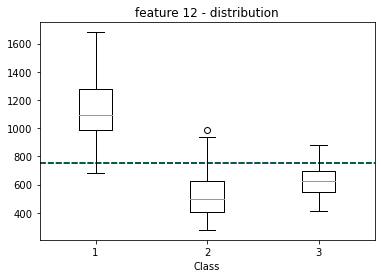

In [23]:
feature_number = 12
X1, X2, X3 = wine.data[wine.target==0][:, feature_number], wine.data[wine.target==1][:, feature_number], wine.data[wine.target==2][:, feature_number]

fig, ax = plt.subplots()
ax.set_title(f'feature {feature_number} - distribution')
ax.boxplot([X1, X2, X3])
ax.hlines(755, 0.5, 3.5, colors="r", linestyles="dashed")
ax.hlines(min(threshold_filtered), 0.5, 3.5, colors="b", linestyles="dashed")
ax.hlines(max(threshold_filtered), 0.5, 3.5, colors="b", linestyles="dashed")
ax.hlines(sum(threshold_filtered)/len(threshold_filtered), 0.5, 3.5, colors="g", linestyles="dashed")
plt.xlabel("Class")
plt.show()